In [2]:
%matplotlib widget
import jungfrau_utils as ju
import numpy as np
import json, h5py
import os, glob
import time
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm
from scipy.optimize import curve_fit
from IPython.display import clear_output, display
import matplotlib.colors as colors
import matplotlib.ticker as ticker
from ipyfilechooser import FileChooser
from scipy.stats.stats import pearsonr

from alvra_tools.load_data import *
from alvra_tools.channels import *
from alvra_tools.utils import *

from alvra_tools.XAS_functions import *
from alvra_tools.timing_tool import *

import warnings
warnings.filterwarnings('ignore')

In [30]:
datafiles_2D = []
for file in glob('/sf/alvra/data/p19637/raw/catalog/timing_BT1T_Lumtec_10mM.*/data/acq0001.PVCHANNELS.h5'):
    datafiles_2D.append(file)
datafiles_2D = sorted(datafiles_2D)#, key = os.path.getmtime)
patch = datafiles_2D[:-11]
patch

['/sf/alvra/data/p19637/raw/catalog/timing_BT1T_Lumtec_10mM.run0054/data/acq0001.PVCHANNELS.h5',
 '/sf/alvra/data/p19637/raw/catalog/timing_BT1T_Lumtec_10mM.run0055/data/acq0001.PVCHANNELS.h5',
 '/sf/alvra/data/p19637/raw/catalog/timing_BT1T_Lumtec_10mM.run0056/data/acq0001.PVCHANNELS.h5',
 '/sf/alvra/data/p19637/raw/catalog/timing_BT1T_Lumtec_10mM.run0057/data/acq0001.PVCHANNELS.h5',
 '/sf/alvra/data/p19637/raw/catalog/timing_BT1T_Lumtec_10mM.run0058/data/acq0001.PVCHANNELS.h5',
 '/sf/alvra/data/p19637/raw/catalog/timing_BT1T_Lumtec_10mM.run0059/data/acq0001.PVCHANNELS.h5',
 '/sf/alvra/data/p19637/raw/catalog/timing_BT1T_Lumtec_10mM.run0060/data/acq0001.PVCHANNELS.h5',
 '/sf/alvra/data/p19637/raw/catalog/timing_BT1T_Lumtec_10mM.run0061/data/acq0001.PVCHANNELS.h5',
 '/sf/alvra/data/p19637/raw/catalog/timing_BT1T_Lumtec_10mM.run0062/data/acq0001.PVCHANNELS.h5',
 '/sf/alvra/data/p19637/raw/catalog/timing_BT1T_Lumtec_10mM.run0063/data/acq0001.PVCHANNELS.h5',
 '/sf/alvra/data/p19637/raw/ca

In [31]:
energy_2D = []
for file in patch:
    with h5py.File(file,'r') as f:
        energy_2D.append(f['SAROP11-ARAMIS:ENERGY']['data'][0])
np.shape(energy_2D)     

(15,)

In [32]:
datafiles = []
for file in glob('/das/work/p19/p19637/Claudio/Reduced/*timing*.txt'):
    datafiles.append(file)
datafiles = sorted(datafiles)#, key = os.path.getmtime)
patch = datafiles[:-3]
np.shape(patch)

(15,)

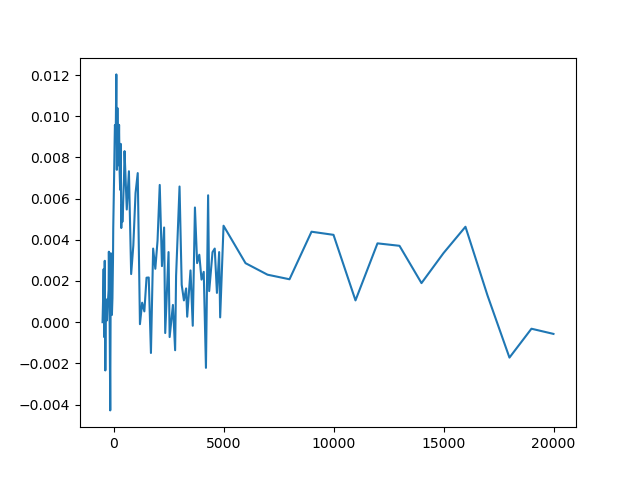

In [79]:
plt.figure()
plt.plot(np.transpose(np.genfromtxt(patch[0]))[0],np.transpose(np.genfromtxt(patch[0]))[1])
plt.show()

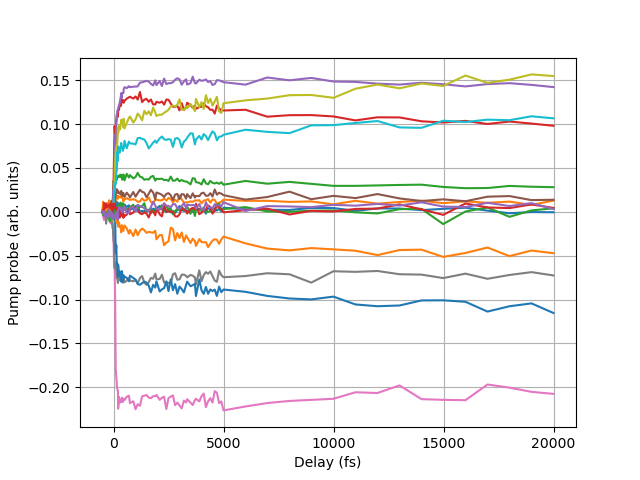

In [40]:
scan_2D = []

plt.figure()
for index in range(len(patch)):
    label = patch[index].split('/')[-1]
    Delay = np.transpose(np.genfromtxt(patch[index]))[0]
    Int = np.transpose(np.genfromtxt(patch[index]))[1]
    scan_2D.append(Int)
    plt.plot(En, Int, label = label.split('-')[1].split('_')[-1])
#plt.legend(loc='best')
plt.xlabel('Delay (fs)')
plt.ylabel('Pump probe (arb. units)')
plt.grid()
plt.show()
plt.tight_layout()

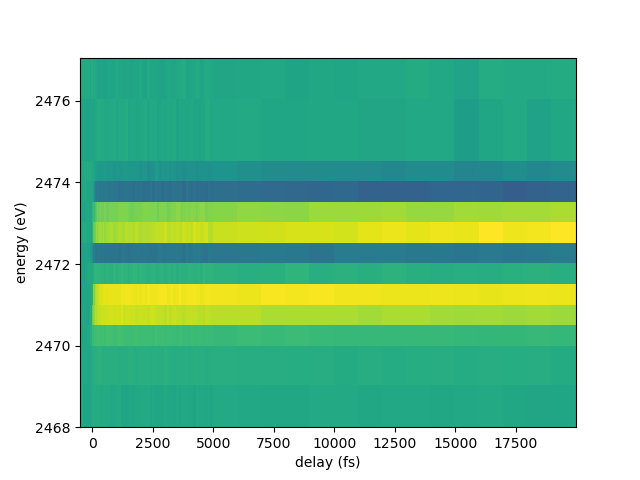

In [38]:
plt.figure()
plt.pcolor(Delay, energy_2D, scan_2D)
plt.xlabel('delay (fs)')
plt.ylabel('energy (eV)')

plt.show()

In [74]:
data = np.array([21.3324, 11.13, 11.23, 1324.3423])
factor = 11.3

data_rounded = np.round(data/factor)*factor
data_rounded

array([  22.6,   11.3,   11.3, 1322.1])